In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import Activation
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
def custom_activation(x, beta = 0.999):
        return (K.sigmoid(beta * x) * x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Подключение диска
#Создание массива

array =[]
with open("/content/drive/My Drive/Colab Notebooks/Data/catemsd_all_noaft_y.txt") as file:
    for line in file:
        array.append([float(x) for x in line.split()])
array = np.array(array, dtype=np.float64)



*   1990 начинается на 40308
*   1991 начинается на 41448
*   1992 начинается на 42470
*   1993 начинается на 43945
*   1994 начинается на 45490
*   1995 начинается на 46968
*   1996 начинается на 48483
*   1996 заканчивается на 50974
*   1996 длится 2491 строчек



*   1997 начинается на 50975
*   1997 заканчивается на 53472
*   1997 длится 2497 строчек

In [0]:
#Функция подготовки тренировочного массива

def DatalatitudePreparation(length_test,testing_start,training_start,x_train_latitude, y_train_latitude,x_test_latitude,y_test_latitude,length,number_per_epoch,array,sc_time_train,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude):
  time_train = np.zeros(shape=(length+number_per_epoch,1))
  time_test = np.zeros(shape=(length+number_per_epoch,1))
  time = np.zeros(shape=(array.shape[0],1))
  latitude = np.zeros(shape=(array.shape[0],1))
  longitude = np.zeros(shape=(array.shape[0],1))
  depth = np.zeros(shape=(array.shape[0],1))
  magnitude = np.zeros(shape=(array.shape[0],1))
  
  time=time.astype('float64')
  latitude=latitude.astype('float64')
  longitude = longitude.astype('float64')
  depth =depth.astype('float64')
  magnitude =magnitude.astype('float64')

  for i in range(array.shape[0]):
    time[i] = array[i][0]
    latitude[i] = array[i][1]
    longitude[i] = array[i][2]
    depth[i] = array[i][3]
    magnitude[i] = array[i][4]  
  
  mean_latitude = latitude.mean()
  mean_longitude=longitude.mean()

  for i in range(array.shape[0]):
    longitude[i]=(longitude[i]-mean_longitude)
    latitude[i]=(latitude[i]-mean_latitude)

 
  for i in range(number_per_epoch+length):    
    time_train[i]=time[i+training_start]-(time[training_start+i-1])
    #print(time_train[i]) 
    if(time_train[i]>1):
      print(time_train[i],i) 
 
  
  time_train=sc_time_train.fit_transform(time_train)
  time_test=sc_time_test.fit_transform(time_test)
  latitude=sc_latitude.fit_transform(latitude)
  longitude=sc_longitude.fit_transform(longitude)
  depth=sc_depth.fit_transform(depth)
  magnitude=sc_magnitude.fit_transform(magnitude)
  
  for i in range(length):
    for j in range(number_per_epoch):
      x_train_latitude[i][j][0]=time_train[i+j] 
      x_train_latitude[i][j][1]=latitude[i+j+training_start]
      x_train_latitude[i][j][2]=longitude[i+j+training_start]
    y_train_latitude[i]=latitude[i+j+1+training_start]
     




In [0]:
#Задание длинны тренировочного массива и колличество данных в одной порции

length=6000
length_test=100
training_start = 44968
testing_start=53472
number_per_epoch=60
feature_number=3

x_train_latitude = np.zeros(shape=(length,number_per_epoch,3))
y_train_latitude = np.zeros(shape=(length,1))
x_test_latitude = np.zeros(shape=(length,number_per_epoch,3))
y_test_latitude=np.zeros(shape=(length,1))

x_train_latitude=x_train_latitude.astype('float64')
y_train_latitude=y_train_latitude.astype('float64')
x_test_latitude=x_test_latitude.astype('float64')
y_test_latitude=y_test_latitude.astype('float64')

sc_time_train=MinMaxScaler(feature_range=(0,1))
sc_time_test=MinMaxScaler(feature_range=(0,1))
sc_latitude=MinMaxScaler(feature_range=(-1,1))
sc_longitude=MinMaxScaler(feature_range=(-1,1))
sc_depth=MinMaxScaler(feature_range=(0,1))
sc_magnitude=MinMaxScaler(feature_range=(0,1))



DatalatitudePreparation(length_test,testing_start,training_start,x_train_latitude, y_train_latitude,x_test_latitude,y_test_latitude,length,number_per_epoch,array,sc_time_train,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude)




In [0]:
print(sc_time.inverse_transform(model_time.predict(x_test_time)))
print(sc_time.inverse_transform(y_test_time))

[[1960.71]]
[[1962.0221]]


In [7]:
model_latitude = Sequential()
model_latitude.add(LSTM(units=550, return_sequences= True, input_shape=(x_train_latitude.shape[1],3)))
model_latitude.add(LSTM(units=550, return_sequences=True))
model_latitude.add(LSTM(units=550))
model_latitude.add(Dense(units=1,activation='linear'))
model_latitude.summary()

model_latitude.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 550)           1218800   
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 550)           2422200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 550)               2422200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 551       
Total params: 6,063,751
Trainable params: 6,063,751
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_latitude.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Latitude/coursework_dims_LSTM_latitude_2.h5')

In [0]:
hist_latitude=model_latitude.fit(x_train_latitude,y_train_latitude, epochs=300, batch_size=32)


Epoch 1/300
6000/6000 [==============================] - 65s 11ms/step - loss: 0.0273
Epoch 2/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0180
Epoch 3/300
6000/6000 [==============================] - 62s 10ms/step - loss: 0.0125
Epoch 4/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0091
Epoch 5/300
6000/6000 [==============================] - 63s 11ms/step - loss: 0.0068
Epoch 6/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0053
Epoch 7/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0040
Epoch 8/300
6000/6000 [==============================] - 62s 10ms/step - loss: 0.0031
Epoch 9/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0024
Epoch 10/300
6000/6000 [==============================] - 63s 11ms/step - loss: 0.0021
Epoch 11/300
6000/6000 [==============================] - 63s 10ms/step - loss: 0.0017
Epoch 12/300
6000/6000 [===========================

In [0]:
model_time.evaluate(x_test_time,y_test_time,batch_size=32)

In [0]:
plot_model(model_time,show_shapes=True, to_file='model.png')

In [0]:
plot_model(model_coords,show_shapes=True, to_file='model.png')

In [0]:
model_latitude.save_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Latitude/coursework_dims_LSTM_latitude_3.h5')
#model_coords.save_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_coords.h5')     

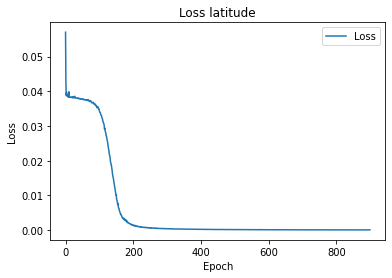

In [0]:
plt.plot(hist_latitude.history['loss'], label='Loss')
#plt.plot(hist_time.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss latitude')
plt.legend(loc='upper right')

In [0]:
def TimePrediction(x_test_array, y_test_array,sc_time):
  pred = np.zeros(shape = (y_test_array.shape[0]))
  pred = pred.astype('float32')  
  pred=model_time.predict(x_test_array)
  pred=sc_time.inverse_transform(pred)
  y_test_time_plot=sc_time.inverse_transform(y_test_time)
  print(y_test_time_plot)
  plt.plot(pred, label='Predicted')
  plt.plot(y_test_time_plot, label='Real')
  plt.xlabel('Epoch')
  plt.ylabel('Time')
  plt.title('Time')
  plt.legend(loc='upper right')
  plt.show()

In [0]:
TimePrediction(x_test_time,y_test_time,sc_time)

In [0]:
def change_boss_of_this_gym(pred_time,pred_coords,val_par):
  for i in range(val_par.shape[0]-1):
    val_par[0][i]=val_par[i+1]
  val_par[0][val_par.shape[0]][0]=pred_time[0]
  val_par[0][val_par.shape[0]][1]=pred_coords[0][0]
  val_par[0][val_par.shape[0]][2]=pred_coords[0][1]


In [0]:
def print_resaults(pred_array):
  print(pred_array)
  plt.scatter(pred_array[0][1],pred_array[0][2])
  plt.title('Predicted coordinates')
  plt.xlabel('latitude')
  plt.ylabel('longitude')
  plt.show()

  plt.plot(pred_array[0][0])
  plt.title('Predicted time')
  plt.xlabel('Number')
  plt.ylabel('time')
  plt.show()
  

In [0]:
Prediction(model_time,model_coords, array,10)

In [0]:
def Prediction(model_time,model_coords, array, number):
  sc_time=MinMaxScaler(feature_range=(0,1))
  sc_latitude=MinMaxScaler(feature_range=(0,1))
  sc_longitude=MinMaxScaler(feature_range=(0,1))

  time = np.zeros(shape=(array.shape[0],1))
  latitude = np.zeros(shape=(array.shape[0],1))
  longitude = np.zeros(shape=(array.shape[0],1))
    
  time=time.astype('float32')
  latitude=latitude.astype('float32')
  longitude = longitude.astype('float32')
  
  for i in range(array.shape[0]):
    time[i] = array[i][0]
    latitude[i] = array[i][1]
    longitude[i] = array[i][2]
  
  mean_latitude = latitude.mean()
  mean_longitude=longitude.mean()

  for i in range(array.shape[0]):
    longitude[i]=(longitude[i]-mean_longitude)
    latitude[i]=(latitude[i]-mean_latitude)
  
  for i in range(1,array.shape[0]):
    time[i]=time[i]-time[i-1]
  first_time = time[0]
  time[0]=0

  time=sc_time.fit_transform(time)
  latitude=sc_latitude.fit_transform(latitude)
  longitude=sc_longitude.fit_transform(longitude)

  val_par = np.zeros(shape=(1,30,3))
  pred_array = np.zeros(shape = (number,3,1))

  pred_array = pred_array.astype('float32')  
  val_par=val_par.astype('float32')  
 
  for i in range(30):
    val_par[0][i][0] = time[i]
    val_par[0][i][1] = latitude[i]
    val_par[0][i][2]= longitude[i]

  for i in range(number):
    pred_time = model_time.predict(val_par)
    pred_coords = model_coords.predict(val_par)
    change_boss_of_this_gym(pred_time,pred_coords,val_par)
    pred_array[i][0]=pred_time
    pred_array[i][1]=pred_coords[0][0]
    pred_array[i][2]=pred_coords[0][1]

  pred_array[0] = sc_time.inverse_transform(pred_array[0])
  pred_array[1] = sc_latitude.inverse_transform(pred_array[1])
  pred_array[2] = sc_longitude.inverse_transform(pred_array[2])

  for i in range(pred_array.shape[0]):
    pred_array[i][0] = pred_array[i][0]+first_time
    pred_array[i][1] = pred_array[i][1]+mean_latitude
    pred_array[i][2] = pred_array[i][2]+mean_longitude

  print_resaults(pred_array)

In [0]:
model_time.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_time.h5')
model_coords.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_coords.h5')

In [0]:
def GetTestData(x_test_time,y_test_time,array,length_test,lenght_start,sc_time,sc_latitude,sc_longitude,sc_depth,sc_magnitude):
  time_test = np.zeros(shape=(array.shape[0],1))
  latitude_test = np.zeros(shape=(array.shape[0],1))
  longitude_test = np.zeros(shape=(array.shape[0],1))
  depth_test = np.zeros(shape=(array.shape[0],1))
  magnitude_test = np.zeros(shape=(array.shape[0],1))
  
  time_test=time_test.astype('float64')
  latitude_test=latitude_test.astype('float64')
  longitude_test = longitude_test.astype('float64')
  depth_test =depth_test.astype('float64')
  magnitude_test =magnitude_test.astype('float64')

  for i in range(array.shape[0]):
    time_test[i] = array[i][0]
    latitude_test[i] = array[i][1]
    longitude_test[i] = array[i][2]
    depth_test[i] = array[i][3]
    magnitude_test[i] = array[i][4]  
  

  
  mean_latitude_test = latitude_test.mean()
  mean_longitude_test=longitude_test.mean()

  for i in range(array.shape[0]):
    longitude_test[i]=(longitude_test[i]-mean_longitude_test)
    latitude_test[i]=(latitude_test[i]-mean_latitude_test)

  for i in range(1,array.shape[0]):
    time_test[i]=time_test[i]-array[i-1][0]   

  time_test=sc_time.fit_transform(time_test)
  latitude_test=sc_latitude.fit_transform(latitude_test)
  longitude_test=sc_longitude.fit_transform(longitude_test)
  depth_test=sc_depth.fit_transform(depth_test)
  magnitude_test=sc_magnitude.fit_transform(magnitude_test)

  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_time[i][j][0]=time_test[i+j+lenght_start]
      x_test_time[i][j][1]=latitude_test[i+j+lenght_start]
      x_test_time[i][j][2]=longitude_test[i+j+lenght_start]    
    y_test_time[i]=time_test[i+j+1+lenght_start]
   
    
    

In [0]:
lenght_start=8
length_test=1

x_test_time = np.zeros(shape=(length_test,number_per_epoch,3))
y_test_time = np.zeros(shape=(length_test,1))

x_test_time=x_test_time.astype('float64')
y_test_time=y_test_time.astype('float64')


GetTestData(x_test_time,y_test_time,array,length_test,lenght_start,sc_time,sc_latitude,sc_longitude,sc_depth,sc_magnitude)